# Segmentation QC

In [63]:
%load_ext autoreload
%autoreload 2
%env ANYWIDGET_HMR=1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: ANYWIDGET_HMR=1


In [67]:
# macOS requirement
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import celldega as dega
import matplotlib.pyplot as plt
os.environ['DYLD_LIBRARY_PATH'] = '/opt/homebrew/lib:' + os.environ.get('DYLD_LIBRARY_PATH', '')

In [65]:
segmentation_approachs = ["Cellpose2", "Cellpose-Default", "InstanSeg-Default", "Xenium-Default"]
directories = ["xenium_skin_cellpose2", "xenium_skin_cellpose_default", "xenium_skin_instanseg_default", "xenium_skin_xenium_default"]
from_stp_list = [True, True, True, True]

In [66]:
for directory, segmentation_approach, from_stp in zip(directories, segmentation_approachs, from_stp_list):
    
    dega.qc.qc_segmentation(transcript_metadata_file=f"data/segmentation_metrics_data/{directory}/partitioned_transcripts_metadata.parquet", 
                          transcript_data_file=f"data/segmentation_metrics_data/{directory}/transcripts_coordinates.csv", 
                          cell_polygon_metadata_file=f"data/segmentation_metrics_data/{directory}/cell_metadata.parquet", 
                          cell_polygon_data_file=f"data/segmentation_metrics_data/{directory}/cell_polygons.parquet", 
                          subset_interval_y_x=[0,20294,0,42748],
                          pixel_size=0.2125, 
                          dataset_name="Xenium-Skin", 
                          segmentation_approach=segmentation_approach, 
                          from_stp=from_stp)

segmentation metrics calculation completed
segmentation metrics calculation completed
segmentation metrics calculation completed
segmentation metrics calculation completed


/var/folders/_6/bhs42vt57t1dkb59k4sy0p440000gp/T/ipykernel_6732/419406837.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data["number_cells"] = plot_data["number_cells"] / plot_data["number_cells"].max()
/var/folders/_6/bhs42vt57t1dkb59k4sy0p440000gp/T/ipykernel_6732/419406837.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data["mean_cell_area"] = plot_data["mean_cell_area"] / plot_data["mean_cell_area"].max()


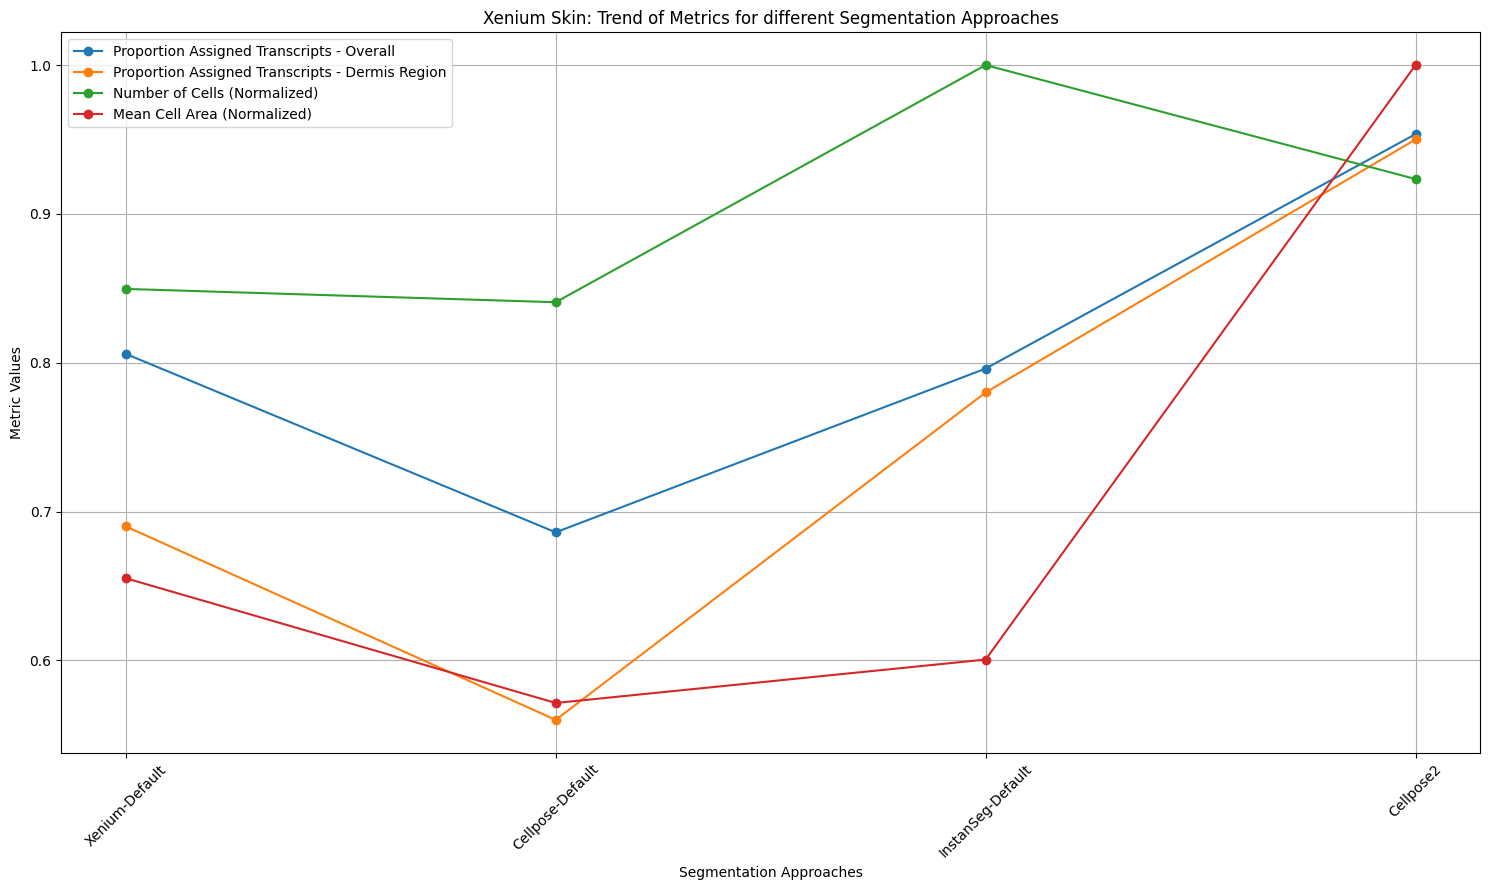

In [83]:
csv_files = ["data/segmentation_metrics_data/outputs/qc_segmentation_Xenium-Skin-Xenium-Default.csv", 
             "data/segmentation_metrics_data/outputs/qc_segmentation_Xenium-Skin-Cellpose-Default.csv", 
             "data/segmentation_metrics_data/outputs/qc_segmentation_Xenium-Skin-InstanSeg-Default.csv",
             "data/segmentation_metrics_data/outputs/qc_segmentation_Xenium-Skin-Cellpose2.csv"]

combined_metrics = pd.DataFrame()

for file in csv_files:
    df = pd.read_csv(file)
    combined_metrics = pd.concat([combined_metrics, df], ignore_index=True)

combined_metrics.drop(['Unnamed: 0'], axis=1, inplace=True)

columns_to_plot = [
    "segmentation_approach",              
    "proportion_assigned_transcripts",  
    "number_cells",               
    "mean_cell_area"           
]

plot_data = combined_metrics[columns_to_plot]

# normalize data for better visualization (optional, as the scales might differ significantly)
plot_data["number_cells"] = plot_data["number_cells"] / plot_data["number_cells"].max()
plot_data["mean_cell_area"] = plot_data["mean_cell_area"] / plot_data["mean_cell_area"].max()

plt.figure(figsize=(15, 9))

plt.plot(plot_data["segmentation_approach"], plot_data["proportion_assigned_transcripts"], marker='o', label="Proportion Assigned Transcripts - Overall")
plt.plot(plot_data["segmentation_approach"], [0.69, 0.56, 0.78, 0.95], marker='o', label="Proportion Assigned Transcripts - Dermis Region")
plt.plot(plot_data["segmentation_approach"], plot_data["number_cells"], marker='o', label="Number of Cells (Normalized)")
plt.plot(plot_data["segmentation_approach"], plot_data["mean_cell_area"], marker='o', label="Mean Cell Area (Normalized)")

plt.xticks(rotation=45)
plt.xlabel("Segmentation Approaches")
plt.ylabel("Metric Values")
plt.title("Xenium Skin: Trend of Metrics for different Segmentation Approaches")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# make grouped bar plots 
# plot from 0 (or lowest) to 1 (or highest)